# Visualización: Gráficos

El siguiente notebook tiene como objetivo enseñar a realizar gráficos cientificos en Python, para ello usaremos la librería matplotlib, en particular usaremos el módulo pyplot que tiene una interfaz similar a MATLAB. 

Este notebook tiene como principal guía el tutorial oficial, el cual se puede acceder en el siguiente [link](https://matplotlib.org/users/pyplot_tutorial.html).

Lo primero es importar la libería y el módulo

`import matplotlib.pyplot as plt
`

In [102]:
## Importando librerías! ##
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

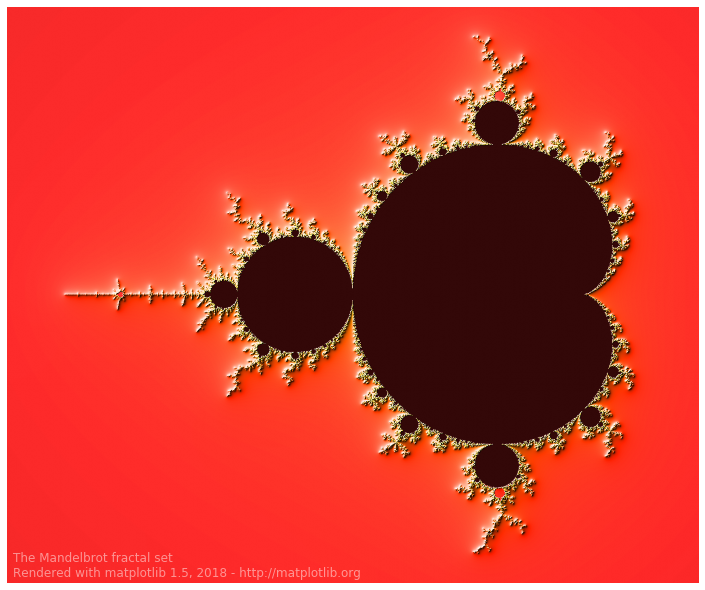

In [104]:
## EJEMPLO DISPONIBLE EN LINK ENTREGADO ARRIBA ###


def mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon=2.0):
    X = np.linspace(xmin, xmax, xn).astype(np.float32)
    Y = np.linspace(ymin, ymax, yn).astype(np.float32)
    C = X + Y[:, None] * 1j
    N = np.zeros_like(C, dtype=int)
    Z = np.zeros_like(C)
    for n in range(maxiter):
        I = np.less(abs(Z), horizon)
        N[I] = n
        Z[I] = Z[I]**2 + C[I]
    N[N == maxiter-1] = 0
    return Z, N


if __name__ == '__main__':
    import time
    import matplotlib
    from matplotlib import colors
    import matplotlib.pyplot as plt

    xmin, xmax, xn = -2.25, +0.75, 3000/2
    ymin, ymax, yn = -1.25, +1.25, 2500/2
    maxiter = 200
    horizon = 2.0 ** 40
    log_horizon = np.log(np.log(horizon))/np.log(2)
    Z, N = mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon)

    
    with np.errstate(invalid='ignore'):
        M = np.nan_to_num(N + 1 -
                          np.log(np.log(abs(Z)))/np.log(2) +
                          log_horizon)

    dpi = 72
    width = 10
    height = 10*yn/xn
    fig = plt.figure(figsize=(width, height), dpi=dpi)
    ax = fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False, aspect=1)

    
    light = colors.LightSource(azdeg=315, altdeg=10)
    M = light.shade(M, cmap=plt.cm.hot, vert_exag=1.5,
                    norm=colors.PowerNorm(0.3), blend_mode='hsv')
    plt.imshow(M, extent=[xmin, xmax, ymin, ymax], interpolation="bicubic")
    ax.set_xticks([])
    ax.set_yticks([])

    
    year = time.strftime("%Y")
    major, minor, micro = matplotlib.__version__.split('.', 2)
    text = ("The Mandelbrot fractal set\n"
            "Rendered with matplotlib %s.%s, %s - http://matplotlib.org"
            % (major, minor, year))
    ax.text(xmin+.025, ymin+.025, text, color="white", fontsize=12, alpha=0.5)

    plt.show()

### Gráfica simple

Realicemos la gráfica de la funnción $f(x) = x^2$, para $x\in [0,2]$. Para ello usaremos la  función `plot(X,Y)`. La cual grafica los array $X$ vs $Y$.

In [105]:
x = np.linspace(0,2, 20) ## creamos los puntos del eje x, 20 puntos equidistanciados en el intervalo [0,2]
y = x**2
print x
print y

[0.         0.10526316 0.21052632 0.31578947 0.42105263 0.52631579
 0.63157895 0.73684211 0.84210526 0.94736842 1.05263158 1.15789474
 1.26315789 1.36842105 1.47368421 1.57894737 1.68421053 1.78947368
 1.89473684 2.        ]
[0.         0.01108033 0.04432133 0.09972299 0.17728532 0.27700831
 0.39889197 0.54293629 0.70914127 0.89750693 1.10803324 1.34072022
 1.59556787 1.87257618 2.17174515 2.49307479 2.8365651  3.20221607
 3.5900277  4.        ]


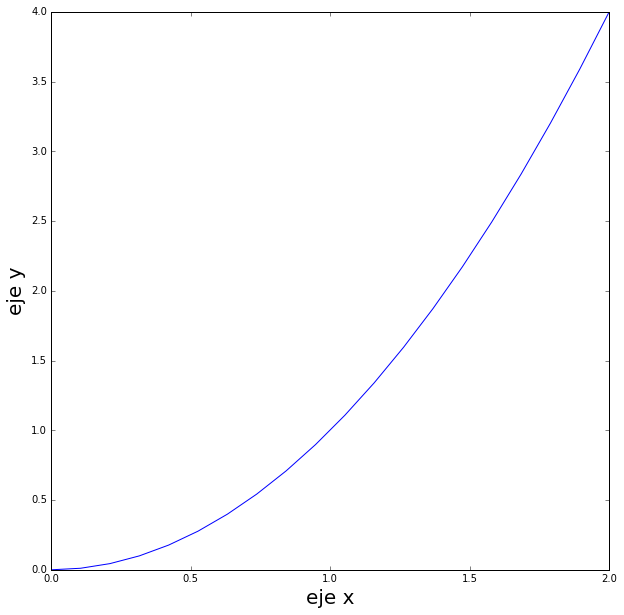

In [107]:
## gráfica simple ##
plt.figure(figsize = (10,10)) ## Creamos una figura de tamaño 10x10 pulgadas
plt.plot(x,y)   ## Gráficamos los array,x vs y
plt.ylabel('eje y', fontsize=20) ## etiquetamos los ejes
plt.xlabel('eje x', fontsize=20)
plt.show() ## Mostramos la imagen

A veces conviene gráficar el conjunto de puntos, para ello usamos `scatterplot(X,Y)`

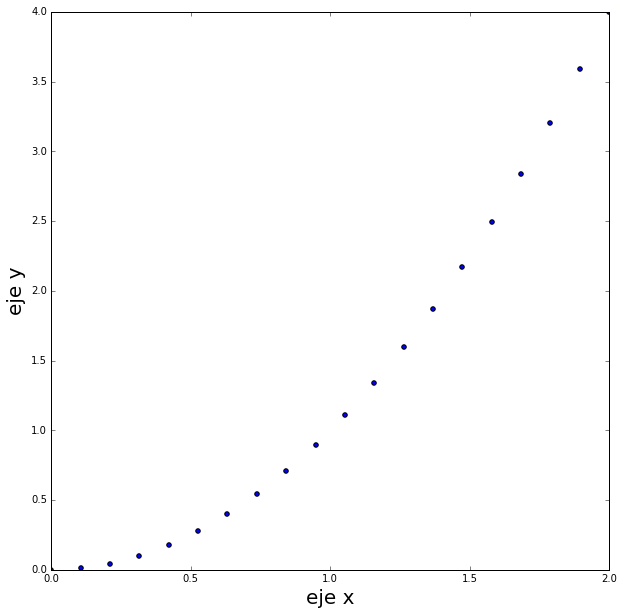

In [108]:
## graficando solo el conjunto de puntos ##
plt.figure(figsize = (10,10)) 
plt.scatter(x,y) 
plt.xlim( x[0],x[-1])
plt.ylim(y[0], y[-1])  ## a diferencia del gráfico anterior, especificamos los limites, pues el scatter plot no los ajusta automaticamente
plt.ylabel('eje y', fontsize=20) 
plt.xlabel('eje x', fontsize=20)
plt.show()

### Cambio de color y grosor de linea


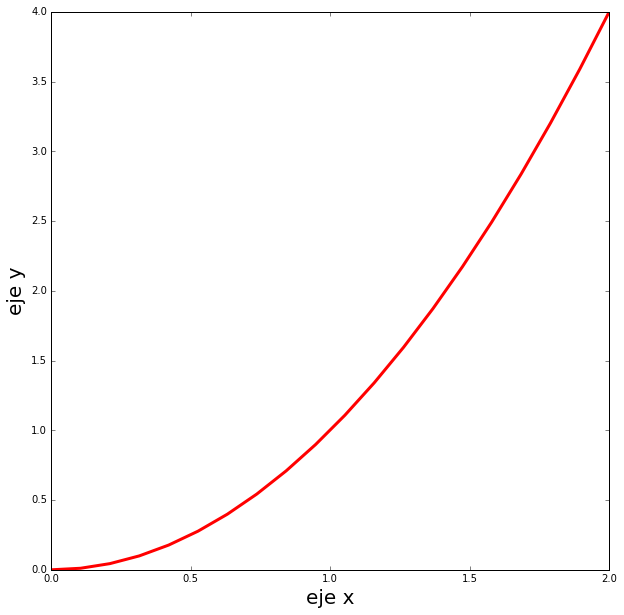

In [109]:
plt.figure(figsize = (10,10)) 
plt.plot(x,y ,  color = "red", linewidth=3)   ## especificamos el color y el grosor de linea (en pixeles)
plt.ylabel('eje y', fontsize=20) 
plt.xlabel('eje x', fontsize=20)
plt.show()

### Limites

A veces solo nos interesa gráficar una parte de la función, para ello usamos `xlim()` para establecer los limites en el eje $x$ e `ylim()` para el eje $y$

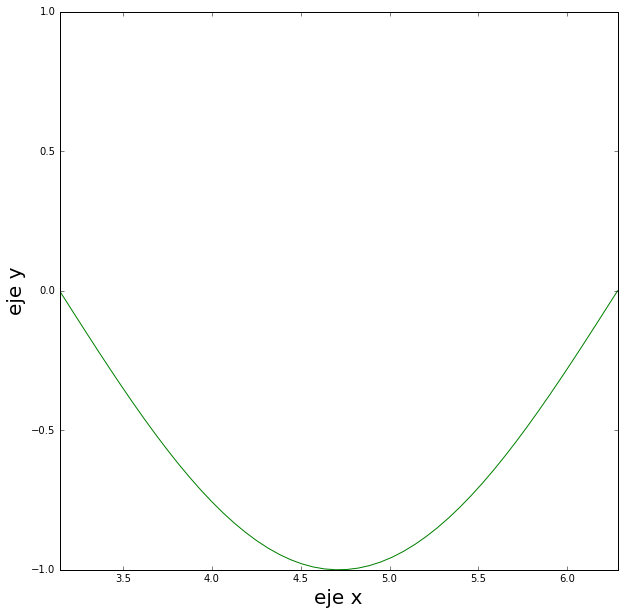

In [110]:
a = np.linspace(0,2*np.pi, 100)
b = np.sin(a)
plt.figure(figsize = (10,10))
plt.ylabel('eje y', fontsize=20) 
plt.xlabel('eje x', fontsize=20)
plt.xlim(np.pi,2*np.pi)
plt.plot(a,b, color = "green")
plt.show()

### ticks
Observe que en gráfico anterior en el eje $x$ se presentan números decimales, sin embargo deseariamos que se mostrara explicitamente los valores de $\pi$. Para ello usamos `xticks()`para poner los valores en el eje $x$ que nosotros queramos!

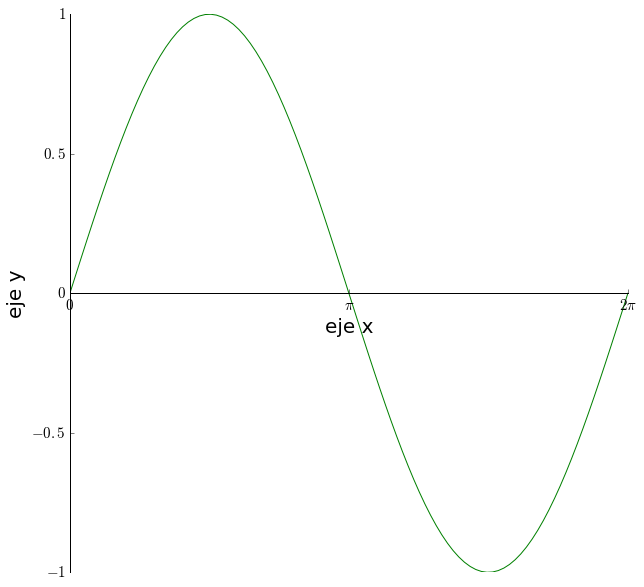

In [9]:
plt.figure(figsize = (10,10))
#### Esta parte del código es para poner el eje x e y centrado en el origen
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
############################################################################
plt.ylabel('eje y', fontsize=20) 
plt.xlabel('eje x', fontsize=20)
plt.xlim(np.pi,2*np.pi)
plt.xticks([0, np.pi,  2*np.pi], [r'$0$', r'$\pi$',r'$2\pi$'], fontsize = 15) 
plt.yticks([-1,-0.5,0,0.5,1], [r'$-1$',r'$-0.5$',r'$0$', r'$0.5$',r'$1$'], fontsize = 15) ## el argumento es un array y un array de latex!! 
plt.plot(a,b, color = "green")
plt.show()

### Se puede poner más de un gráfico por figura


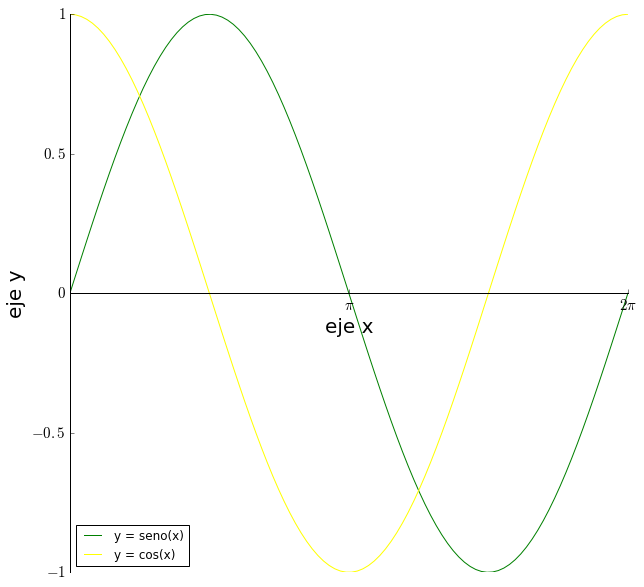

In [111]:
## dos gráficas en una misma figura ##
c =  np.cos(a)
#### Esta parte del código es para poner el eje x e y centrado en el origen
fig, ax = plt.subplots(figsize = (10,10)) 
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')            #### Explicación en la parte de subgraficas
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
############################################################################
plt.ylabel('eje y', fontsize=20) 
plt.xlabel('eje x', fontsize=20)
plt.xticks([ np.pi , 2*np.pi], [ r'$\pi$',r'$2\pi$'], fontsize = 15)
plt.yticks([-1,-0.5,0,0.5,1], [r'$-1$',r'$-0.5$',r'$0$', r'$0.5$',r'$1$'], fontsize = 15)
plt.plot(a,b, color = "green", label="y = seno(x)")
plt.plot(a,c, color = "yellow", label = "y = cos(x)")
plt.legend(loc='best')
plt.show()

### subgráficas

`plt.subplots()` es una función que retorna una tupla, esta contiene una figuera y un objeto denomido axes (contiene la mayoría de las componentes de la figura: ticks, labels etc.). Al usar `fig, ax = plt.subplots()`, guardamos esta tupla en las variables `fig` y `ax`. Tener la variable `fig` es importante si uno quiere cambiar las carácteristicas de la figuera, como el tamaño por ejemplo.  


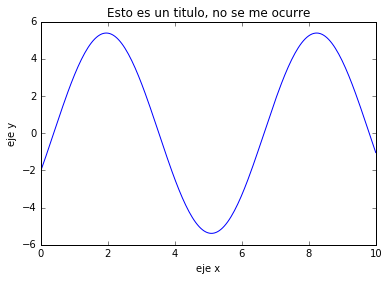

In [116]:
## Una figura! ##
x = np.linspace(0,10,200) ## en el contenedor axes guardamos los objetos de la figura
y = 5*np.sin(x) -  2*np.cos(x)
fig, ax = plt.subplots()
ax.set_xlabel('eje x')
ax.set_ylabel('eje y')
ax.set_title('Esto es un titulo, no se me ocurre') 
ax.plot(x,y)

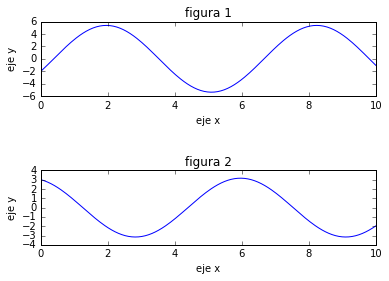

In [117]:
## dos figuras ###
z = 3*np.cos(x) -np.sin(x)
fig, ax = plt.subplots(2) ## la variale ax ahora es un array de longitud 2
ax[0].plot(x, y) 
ax[0].set_xlabel('eje x')
ax[0].set_ylabel('eje y')
ax[0].set_title('figura 1')
ax[1].plot(x,z)
ax[1].set_xlabel('eje x')
ax[1].set_ylabel('eje y')
ax[1].set_title('figura 2')
plt.subplots_adjust(hspace = 1) ## separación entre las figuras, a veces quedan muy juntas. Uno adjusta manualmente la distancia

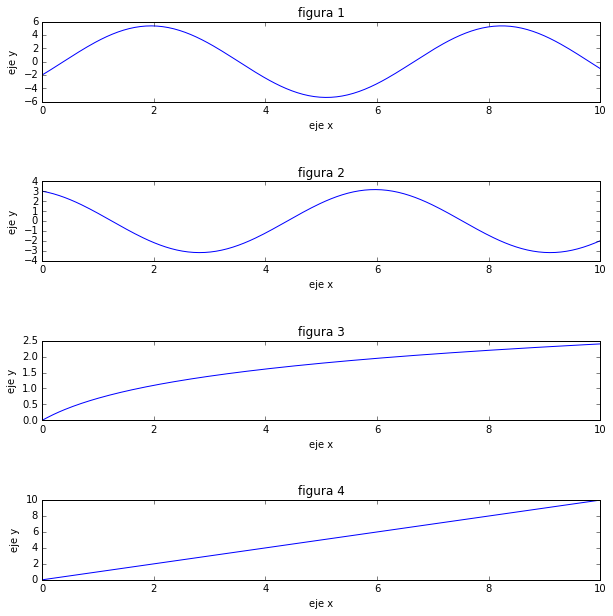

In [118]:
##$ 4 figuras, es lo mismo que lo anterior ##
w = np.log(x+1)
u = x
fig, ax = plt.subplots(4 , figsize=(10,10)) ## la variale ax ahora es un array de longitud 2
ax[0].plot(x, y) 
ax[0].set_xlabel('eje x')
ax[0].set_ylabel('eje y')
ax[0].set_title('figura 1')
ax[1].plot(x,z)
ax[1].set_xlabel('eje x')
ax[1].set_ylabel('eje y')
ax[1].set_title('figura 2')
ax[2].plot(x,w)
ax[2].set_xlabel('eje x')
ax[2].set_ylabel('eje y')
ax[2].set_title('figura 3')
ax[3].plot(x,u)
ax[3].set_xlabel('eje x')
ax[3].set_ylabel('eje y')
ax[3].set_title('figura 4')
plt.subplots_adjust(hspace = 1)


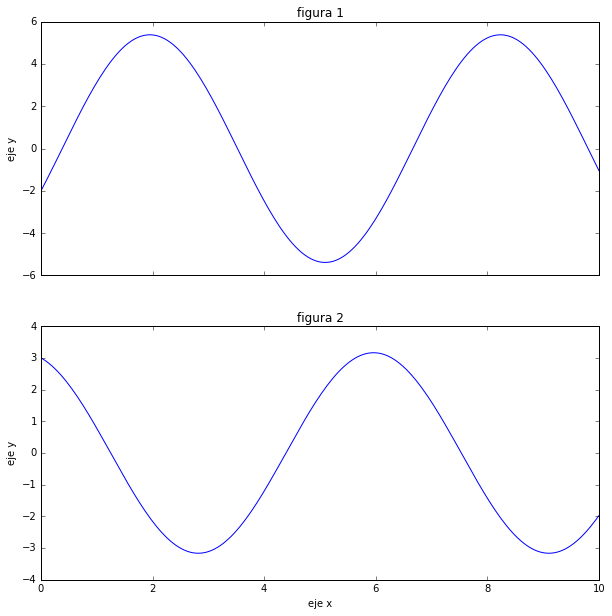

In [43]:
### se puede compartir el eje x o el eje y
fig, ax = plt.subplots(2, sharex = True, figsize = (10,10)) ## la variale ax ahora es un array de longitud 2
ax[0].plot(x, y) 
ax[0].set_ylabel('eje y')
ax[0].set_title('figura 1')
ax[1].plot(x,z)
ax[1].set_xlabel('eje x')
ax[1].set_ylabel('eje y')
ax[1].set_title('figura 2') 


### Gráficas 3D
Para crear la figura y el objeto donde guardaremos las características de esta usando

`fig = plt.figure()`

`ax = plt.gca(projection = '3d')`

#### Generación de la malla

Debemos crear un mallado de puntos, en el dominio de el plano que nos interesa graficar. Por ejemplo grafiquemos la función
$$f(x,y) = 2 + 3x + 5y $$

para $(x,y)\in [0,5]\times[0,5]$.

Usaremos la función de Numpy para crear mallas

`np.meshgrid()
`

In [119]:
### crea un mallado
x = np.linspace(0,5,100)  
y = np.linspace(0,5,100)
x,y = np.meshgrid(x,y)

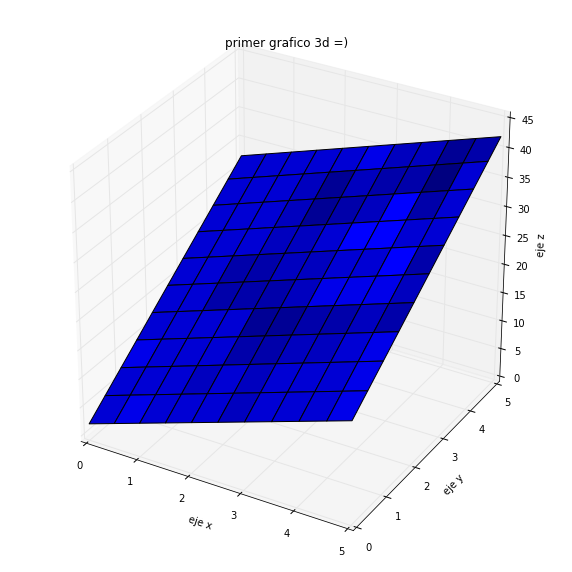

In [120]:
## creando la figura ##
z = 2 + 3*x + 5*y
fig = plt.figure(figsize = (10,10))
ax = fig.gca(projection= '3d')
ax.set_xlabel('eje x')
ax.set_ylabel('eje y')
ax.set_zlabel('eje z')
ax.set_title('primer grafico 3d =)')
ax.plot_surface(x,y,z)

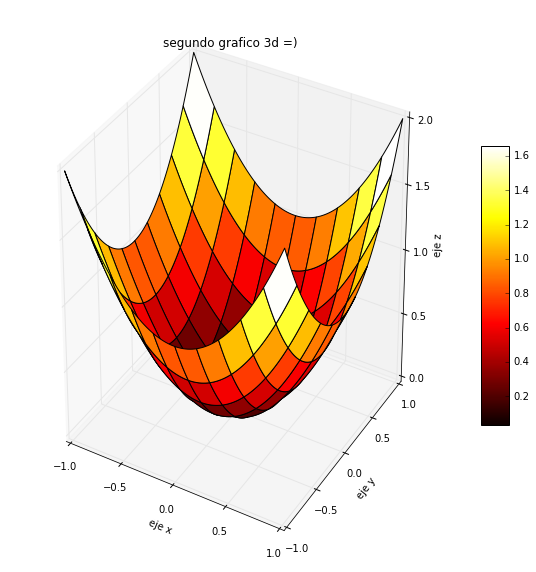

In [121]:
## color bars ##
from matplotlib import cm
x = np.linspace(-1,1,100)
y = np.linspace (-1,1,100)
x,y = np.meshgrid(x,y)
z = x**2 + y**2
fig = plt.figure(figsize = (10,10))
ax = fig.gca(projection= '3d')
ax.set_xlabel('eje x')
ax.set_ylabel('eje y')
ax.set_zlabel('eje z')
ax.set_title('segundo grafico 3d =)')
superficie = ax.plot_surface(x,y,z,  cmap=cm.hot) 
fig.colorbar(superficie, shrink=0.5, aspect=10)

editando!!!